# Project: Investigate a TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Questions
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?

In [3]:
#importing first all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [63]:
# Load your data and print out a few lines
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [64]:
#discover types of each variable and the missings values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [65]:
#number of columns and rows in the data
df.shape

(10866, 21)

In [66]:
#discover the features of each column 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

In [67]:
# First make a copy of my dataset
df_clean = df.copy()

- Drop unnecessary columns (imdb_id, cast, homepage, tagline, keywords, overview, director)

In [68]:
df_clean = df_clean.drop(["imdb_id", "cast", "homepage", "tagline", "keywords", "overview", "director"], axis=1)

In [69]:
#drop any nan values
df_clean.dropna(inplace=True)

In [70]:
#reset the index of rows
df_clean.reset_index(drop=True, inplace=True)

- Drop duplicates rows

In [71]:
#detect the numbers of duplicated rows
df_clean.duplicated().sum()

1

In [72]:
#drop any duplicate row
df_clean.drop_duplicates(inplace=True)

In [73]:
#then resst the index of the rows
df_clean.reset_index(drop=True, inplace=True)

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9826 non-null   int64  
 1   popularity            9826 non-null   float64
 2   budget                9826 non-null   int64  
 3   revenue               9826 non-null   int64  
 4   original_title        9826 non-null   object 
 5   runtime               9826 non-null   int64  
 6   genres                9826 non-null   object 
 7   production_companies  9826 non-null   object 
 8   release_date          9826 non-null   object 
 9   vote_count            9826 non-null   int64  
 10  vote_average          9826 non-null   float64
 11  release_year          9826 non-null   int64  
 12  budget_adj            9826 non-null   float64
 13  revenue_adj           9826 non-null   float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.0+ MB


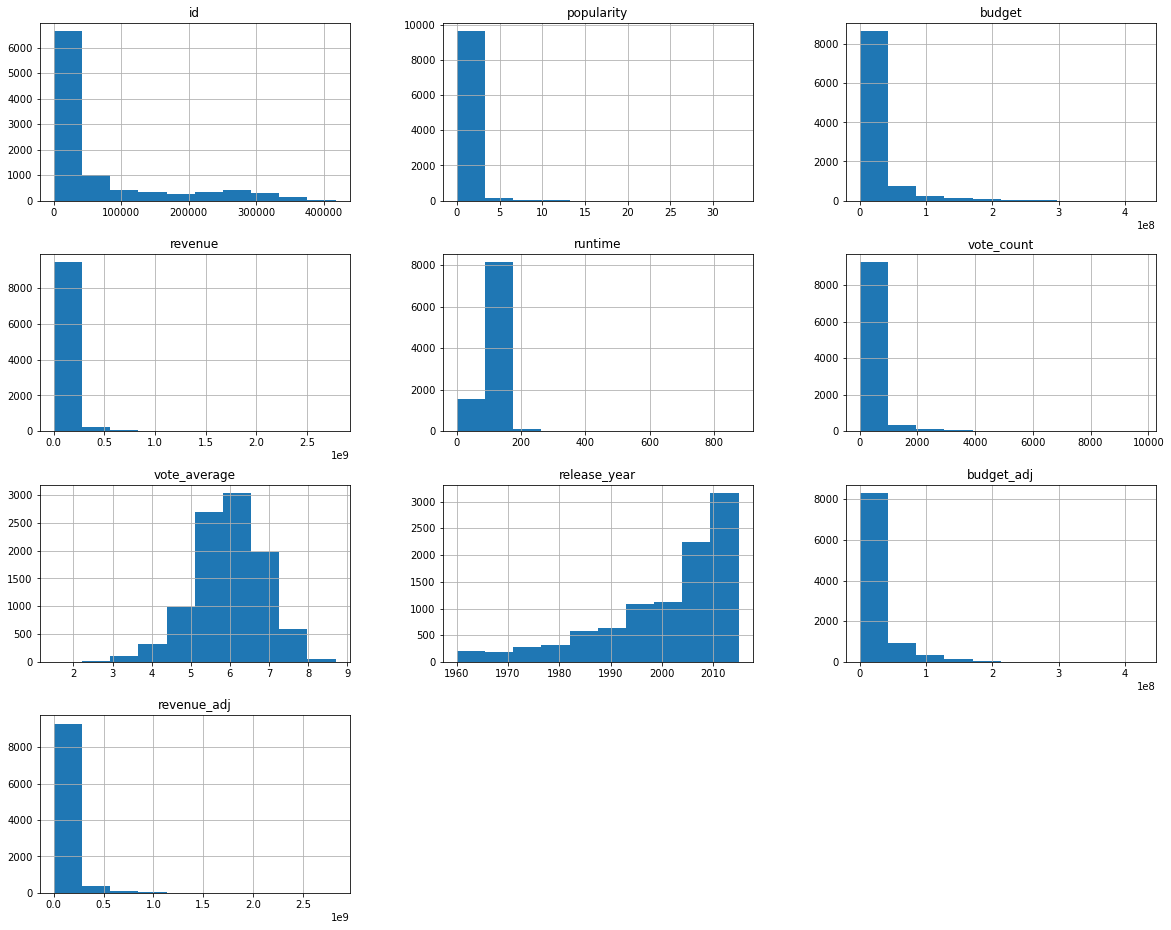

In [75]:
#discover the charactristics of each variable 
df_clean.hist(figsize=(20,16));

- Replace values equals 0 in columns ("budget", "revenue") with the mean

In [76]:
#see first the rows that contain budget and revenue values of 0
df_clean.loc[(df_clean["budget"]==0) & (df_clean["revenue"]==0)]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,2.165433,0,0,Mythica: The Darkspore,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0
92,370687,1.876037,0,0,Mythica: The Necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.0
100,326359,1.724712,0,0,Frozen Fever,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.0
101,254302,1.661789,0,0,High-Rise,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820,5060,0.087034,0,0,Carry On Screaming!,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.0
9821,21,0.080598,0,0,The Endless Summer,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.0
9822,20379,0.065543,0,0,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.0
9823,39768,0.065141,0,0,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.0


In [77]:
#replace all values equals zero in budget and revenue columns with the mean value
df_clean["budget"] = df_clean["budget"].replace(0, df["budget"].mean())
df_clean["revenue"] = df_clean["revenue"].replace(0, df["revenue"].mean())

In [78]:
df_clean.loc[(df_clean["budget"]==0) & (df_clean["revenue"]==0)]

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


- Convert "release_date" to datetime

In [79]:
df_clean["release_date"] = pd.to_datetime(df_clean["release_date"])

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9826 non-null   int64         
 1   popularity            9826 non-null   float64       
 2   budget                9826 non-null   float64       
 3   revenue               9826 non-null   float64       
 4   original_title        9826 non-null   object        
 5   runtime               9826 non-null   int64         
 6   genres                9826 non-null   object        
 7   production_companies  9826 non-null   object        
 8   release_date          9826 non-null   datetime64[ns]
 9   vote_count            9826 non-null   int64         
 10  vote_average          9826 non-null   float64       
 11  release_year          9826 non-null   int64         
 12  budget_adj            9826 non-null   float64       
 13  revenue_adj       

- Deal with "geners" and "production_companies" columns

In [81]:
df_clean["genres"].value_counts()

Drama                                            639
Comedy                                           617
Drama|Romance                                    272
Comedy|Drama                                     255
Comedy|Romance                                   249
                                                ... 
War|Drama|History|Action|Romance                   1
Action|War|Drama                                   1
Action|Comedy|Horror|Thriller                      1
Fantasy|Animation|Action|Comedy                    1
Thriller|Comedy|Drama|Romance|Science Fiction      1
Name: genres, Length: 1926, dtype: int64

In [82]:
df_clean["production_companies"].value_counts()

Paramount Pictures                                                           156
Universal Pictures                                                           133
Warner Bros.                                                                  84
Walt Disney Pictures                                                          75
Columbia Pictures                                                             72
                                                                            ... 
Unified Film Organization (UFO)|Epoch Productions                              1
Agi Orsi Productions|Vans Off the Wall                                         1
Burns Family Studios                                                           1
Dimension Films|Mark Canton Productions|Intellectual Properties Worldwide      1
The Kushner-Locke Company|Hyperion Pictures                                    1
Name: production_companies, Length: 7438, dtype: int64

- Reduce the values in the rows of "genres" and "production_companies" columns that have multiple values 

In [83]:
#replace the cells that conatins multiple values with teh first value in them
df_clean["genres"] = df_clean["genres"].apply(lambda x: x.split("|")[0])
df_clean["production_companies"] = df_clean["production_companies"].apply(lambda x: x.split("|")[0])

In [84]:
df_clean["production_companies"].value_counts()

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
                                         ... 
Running With Scissors                       1
21st Century Film Corporation               1
Red Crown Productions                       1
Edko Films                                  1
Front Street Studios                        1
Name: production_companies, Length: 3053, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which genres are most popular from year to year?

In [88]:
# get first popularity of each genre 
genre_popularity = df_clean.groupby(["genres"])["popularity"].mean()
genre_popularity

genres
Action             0.874669
Adventure          1.275178
Animation          0.867762
Comedy             0.571626
Crime              0.719750
Documentary        0.207301
Drama              0.586444
Family             0.783861
Fantasy            0.907793
Foreign            0.232168
History            0.839363
Horror             0.487790
Music              0.523559
Mystery            0.621116
Romance            0.786560
Science Fiction    1.150894
TV Movie           0.267006
Thriller           0.691054
War                0.789277
Western            0.690646
Name: popularity, dtype: float64

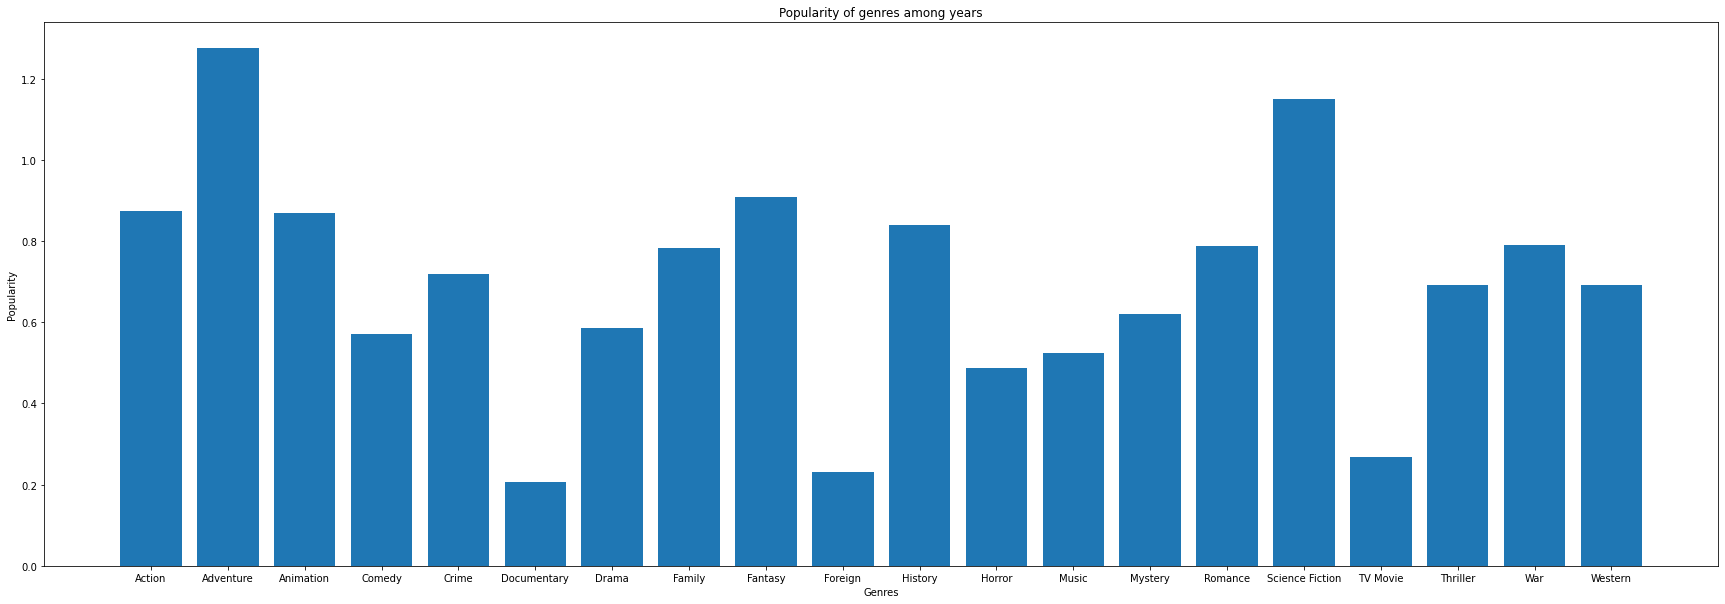

In [98]:
plt.subplots(figsize=(30,10))
plt.bar(genre_popularity.index, genre_popularity)
plt.title("Popularity of genres among years")
plt.xlabel("Genres")
plt.ylabel("Popularity");

From the above gragh we observe that advanture movies is the most popular genre

### Question 2: What kinds of properties are associated with movies that have high revenues?

In [102]:
#start by sorting revenues
sorted_revenues = df_clean.sort_values(by=["revenue"], ascending=False)
sorted_revenues

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1260,19995,9.432768,2.370000e+08,2.781506e+09,Avatar,162,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,136,Action,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4662,597,4.355219,2.000000e+08,1.845034e+09,Titanic,194,Drama,Paramount Pictures,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
3906,24428,7.637767,2.200000e+08,1.519558e+09,The Avengers,143,Science Fiction,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,124,Action,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7625,9431,0.578849,1.500000e+07,5.000000e+00,Bordello of Blood,87,Horror,Tales From The Crypt Holdings,1996-08-16,27,4.9,1996,2.085325e+07,6.951084e+00
1255,18196,0.097126,1.462570e+07,3.000000e+00,The Sentinel,92,Horror,Universal Pictures,1977-01-07,14,6.3,1977,0.000000e+00,1.079334e+01
9577,12101,0.621476,1.462570e+07,3.000000e+00,Soylent Green,97,Mystery,Metro-Goldwyn-Mayer (MGM),1973-04-19,124,6.6,1973,0.000000e+00,1.473348e+01
4525,13537,0.462609,6.000000e+06,2.000000e+00,Shattered Glass,94,Drama,Lions Gate Films,2003-11-14,46,6.4,2003,7.112116e+06,2.370705e+00


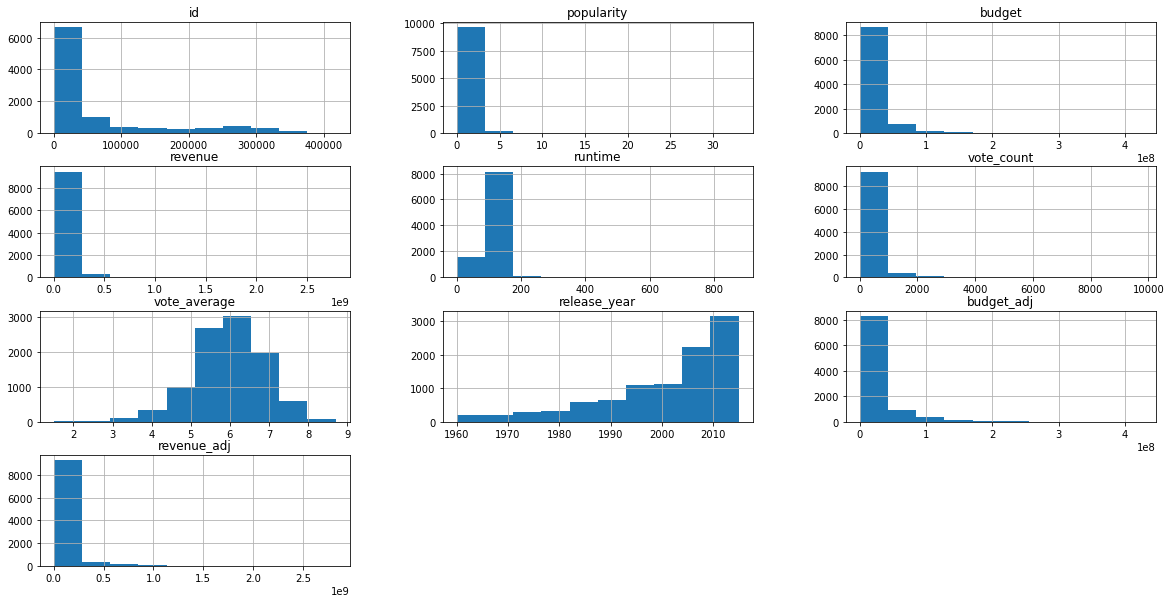

In [109]:
sorted_revenues.hist(figsize=(20,10));

The most revenuable movies has the least runtime among others movies and highest budget and votes

<a id='conclusions'></a>
## Conclusions

- In the first question we found that the most popular genre of movies is advanture movies then science fiction and fantasy movies.
- In the second question we found that the most revenuable movies not that the most popular but that have the highest vote counts and budget and yhe least runtime around 100 mins.

**All results are limited to the underlying data set and no advaned statistics were performed, therefore, the results can only be treated as indicators and are not generalizable. Furthermore, many entries in the dataset have been removed due to missing data**